In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import TimeDistributed
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Permute, Reshape
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import metrics
from sklearn.metrics import classification_report
from keras.layers import Permute, Reshape
import warnings
from sklearn import metrics
warnings.filterwarnings('ignore')

Here the input file is a zip folder contains test and train data

First we are extract the folder and save it our drive

In [4]:
features=list()
with open('/content/drive/MyDrive/HAR SmartPhone/UCI HAR Dataset/features.txt') as feat:
    features=[l.split()[1] for l in feat.readlines()]
print("Number of features = {}".format(len(features)))
for f in features:
    print(f,end=" | ")

Number of features = 561
tBodyAcc-mean()-X | tBodyAcc-mean()-Y | tBodyAcc-mean()-Z | tBodyAcc-std()-X | tBodyAcc-std()-Y | tBodyAcc-std()-Z | tBodyAcc-mad()-X | tBodyAcc-mad()-Y | tBodyAcc-mad()-Z | tBodyAcc-max()-X | tBodyAcc-max()-Y | tBodyAcc-max()-Z | tBodyAcc-min()-X | tBodyAcc-min()-Y | tBodyAcc-min()-Z | tBodyAcc-sma() | tBodyAcc-energy()-X | tBodyAcc-energy()-Y | tBodyAcc-energy()-Z | tBodyAcc-iqr()-X | tBodyAcc-iqr()-Y | tBodyAcc-iqr()-Z | tBodyAcc-entropy()-X | tBodyAcc-entropy()-Y | tBodyAcc-entropy()-Z | tBodyAcc-arCoeff()-X,1 | tBodyAcc-arCoeff()-X,2 | tBodyAcc-arCoeff()-X,3 | tBodyAcc-arCoeff()-X,4 | tBodyAcc-arCoeff()-Y,1 | tBodyAcc-arCoeff()-Y,2 | tBodyAcc-arCoeff()-Y,3 | tBodyAcc-arCoeff()-Y,4 | tBodyAcc-arCoeff()-Z,1 | tBodyAcc-arCoeff()-Z,2 | tBodyAcc-arCoeff()-Z,3 | tBodyAcc-arCoeff()-Z,4 | tBodyAcc-correlation()-X,Y | tBodyAcc-correlation()-X,Z | tBodyAcc-correlation()-Y,Z | tGravityAcc-mean()-X | tGravityAcc-mean()-Y | tGravityAcc-mean()-Z | tGravityAcc-std()-X | 

In [5]:
train = pd.read_csv('/content/drive/MyDrive/HAR SmartPhone/UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None, encoding='latin-1')
train.columns = features
train['subject'] = pd.read_csv('/content/drive/MyDrive/HAR SmartPhone/UCI HAR Dataset/train/subject_train.txt', header=None, squeeze=True)
train['Activity'] = pd.read_csv('/content/drive/MyDrive/HAR SmartPhone/UCI HAR Dataset/train/y_train.txt', names=['Activity'], squeeze=True)
train['ActivityName'] = train['Activity'].map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',4:'SITTING', 5:'STANDING',6:'LAYING'})
train.sample()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
906,0.268128,-0.014411,-0.126682,-0.990022,-0.96814,-0.96076,-0.990995,-0.970953,-0.963499,-0.941428,...,0.06489,0.603553,-0.492839,-0.475587,0.571096,-0.779792,-0.215778,5,6,LAYING


In [6]:
train.shape

(7352, 564)

In [7]:
test = pd.read_csv('/content/drive/MyDrive/HAR SmartPhone/UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None, encoding='latin-1')
test.columns = features
test['subject'] = pd.read_csv('/content/drive/MyDrive/HAR SmartPhone/UCI HAR Dataset/test/subject_test.txt', header=None, squeeze=True)
test['Activity'] = pd.read_csv('/content/drive/MyDrive/HAR SmartPhone/UCI HAR Dataset/test/y_test.txt', names=['Activity'], squeeze=True)
test['ActivityName'] = train['Activity'].map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',4:'SITTING', 5:'STANDING',6:'LAYING'})
test.sample()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
2398,0.254613,-0.041328,-0.147995,-0.917688,-0.878338,-0.902974,-0.93737,-0.872785,-0.898132,-0.772103,...,0.011184,-0.192027,-0.008584,0.597833,-0.578352,0.384945,-0.03204,20,5,STANDING


In [8]:
test.shape

(2947, 564)

In [9]:
print('Duplicates in train = {}'.format(sum(train.duplicated())))
print('Duplicates in test = {}'.format(sum(test.duplicated())))
print('Invalid values in train = {}'.format(train.isnull().values.sum()))
print('Invalid values in test = {}'.format(test.isnull().values.sum()))

Duplicates in train = 0
Duplicates in test = 0
Invalid values in train = 0
Invalid values in test = 0


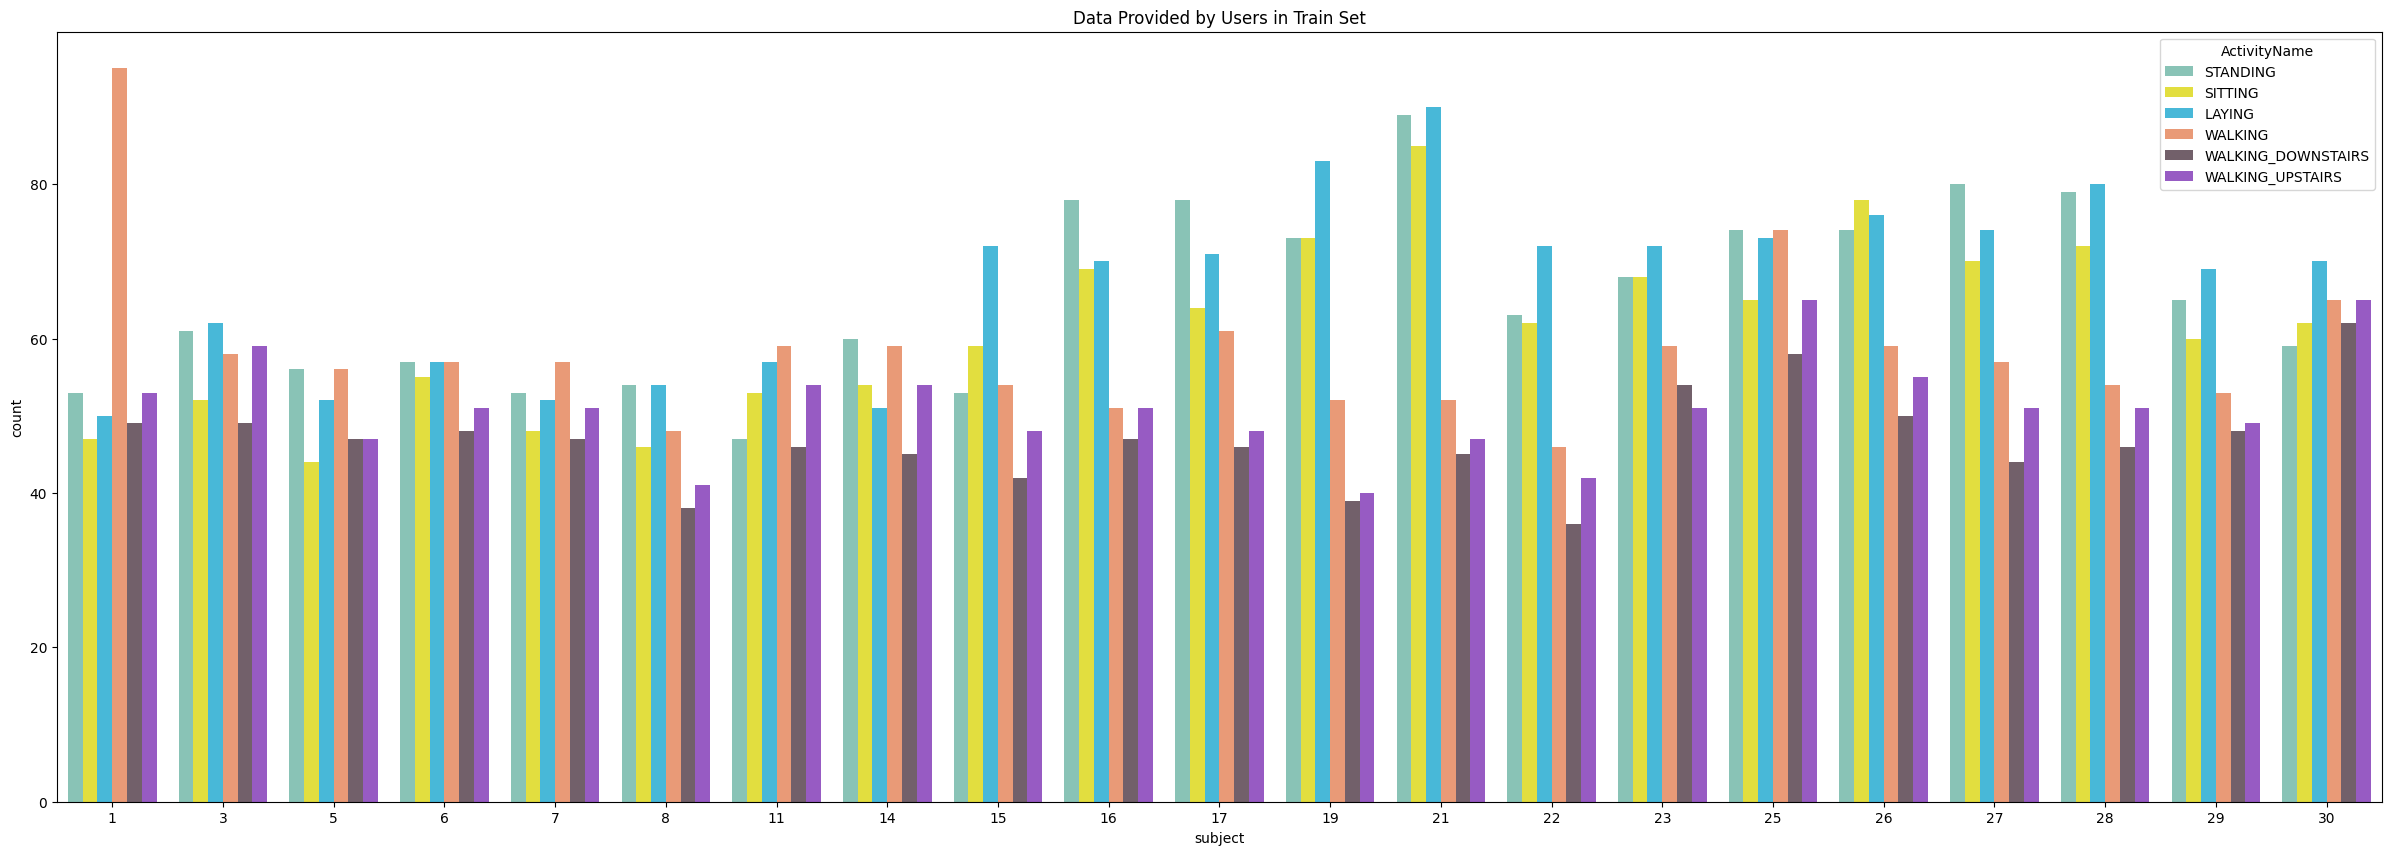

In [10]:
plt.figure(figsize=(30,10))
sns.countplot(x='subject',hue='ActivityName',palette= ["#7fcdbb","#fdf824","#30c6f0","#fc9264","#755d6b","#9a4ad4"], data = train)
plt.title('Data Provided by Users in Train Set')
plt.show()

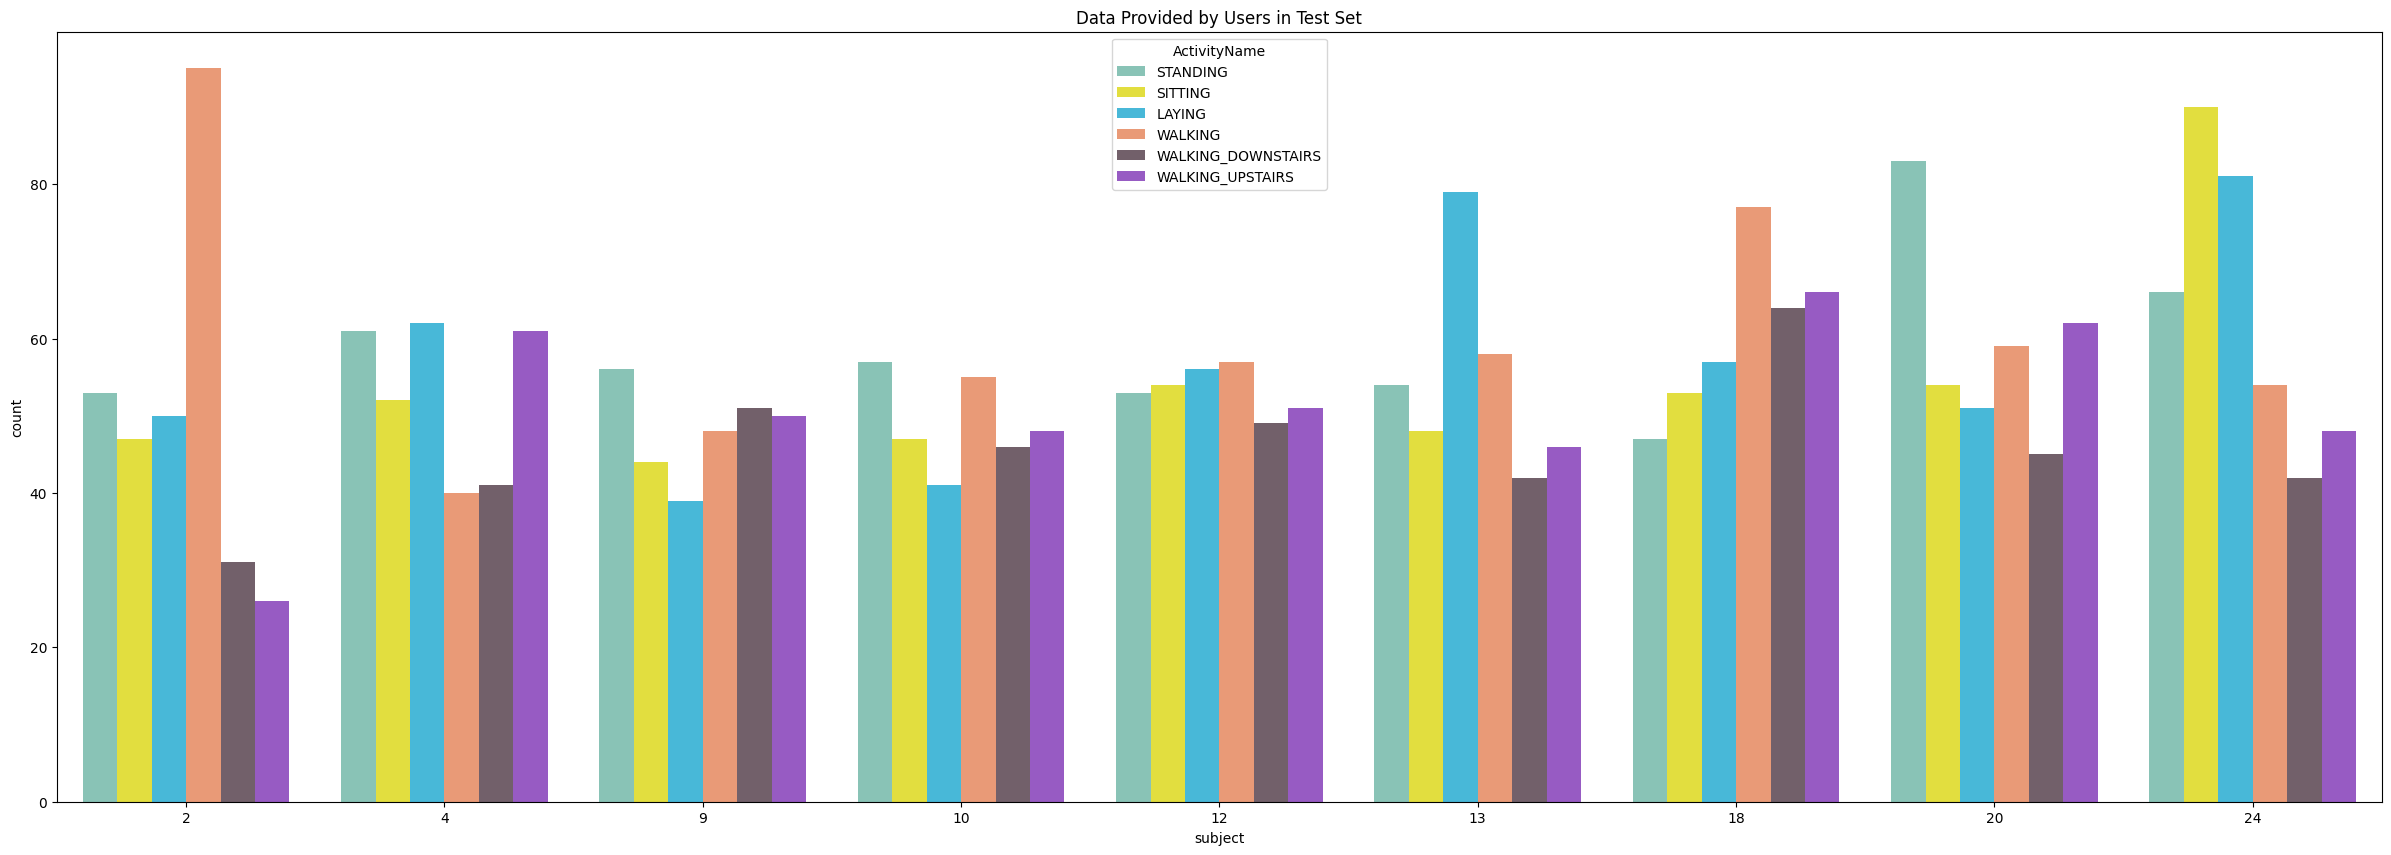

In [11]:
plt.figure(figsize=(30,10))
sns.countplot(x='subject',hue='ActivityName',palette= ["#7fcdbb","#fdf824","#30c6f0","#fc9264","#755d6b","#9a4ad4"], data = test)
plt.title('Data Provided by Users in Test Set')
plt.show()

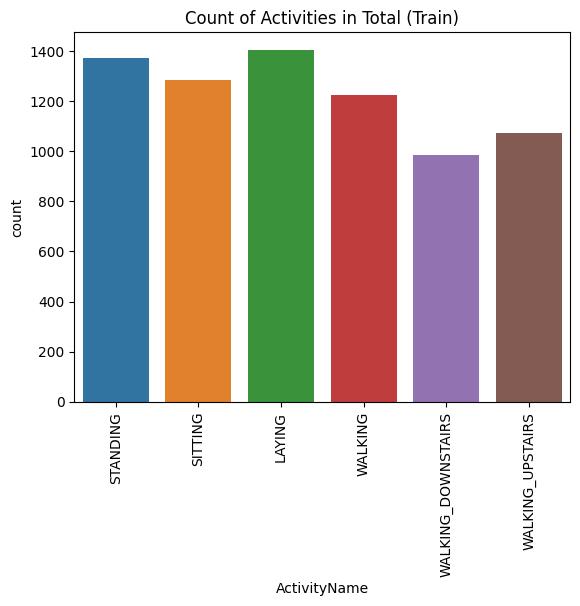

In [12]:
plt.title('Count of Activities in Total (Train)')
sns.countplot(x="ActivityName",data=train)
plt.xticks(rotation=90)
plt.show()

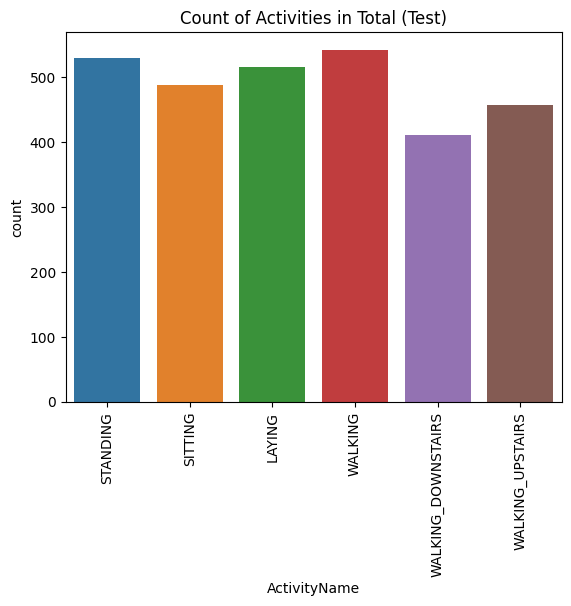

In [13]:
plt.title('Count of Activities in Total (Test)')
sns.countplot(x="ActivityName",data=test)
plt.xticks(rotation=90)
plt.show()

In [14]:
from pandas import read_csv
from numpy import dstack
def file_load(filepath):
    df = read_csv(filepath, header=None, delim_whitespace=True)
    return df.values

In [15]:
def train_test_append(filenames, append_before=''):
    datalist = list()
    for name in filenames:
        data = file_load(append_before + name)
        datalist.append(data)
    datalist = dstack(datalist)
    return datalist

In [16]:
def inertial_signals_load(group, append_before=''):
    filepath = append_before + group + '/Inertial Signals/'
    filenames = list()
    filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
    filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
    filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
    X = train_test_append(filenames, filepath)
    y = file_load(append_before + group + '/y_'+group+'.txt')
    return X, y

In [17]:
def load_dataset(append_before=''):
    trainX, trainy = inertial_signals_load('train', append_before + '/content/drive/MyDrive/HAR SmartPhone/UCI HAR Dataset/')
    testX, testy = inertial_signals_load('test', append_before + '/content/drive/MyDrive/HAR SmartPhone/UCI HAR Dataset/')
    trainy = trainy - 1
    testy = testy - 1
    trainy = to_categorical(trainy)
    testy = to_categorical(testy)
    print(trainX.shape, trainy.shape, testX.shape, testy.shape)
    return trainX, trainy, testX, testy

In [18]:
trainX, trainy, testX, testy = load_dataset()
verbose, epochs, batch_size = 0, 400, 150
n_timesteps = trainX.shape[1]
n_features = trainX.shape[2]
n_outputs = trainy.shape[1]
n_steps = 4
n_length = 32
trainX = trainX.reshape((trainX.shape[0], n_steps, n_length, n_features))
testX = testX.reshape((testX.shape[0], n_steps, n_length, n_features))
print(trainX.shape,testX.shape)

(7352, 128, 9) (7352, 6) (2947, 128, 9) (2947, 6)
(7352, 4, 32, 9) (2947, 4, 32, 9)


In [19]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(None,n_length,n_features), padding="same",kernel_initializer='glorot_uniform', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(BatchNormalization())

model.add(Conv1D(filters=64, kernel_size=3, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(TimeDistributed(MaxPooling1D(pool_size=3)))
model.add(Dropout(0.25))

model.add(Conv1D(filters=128, kernel_size=3, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(BatchNormalization())

# model.add(Conv1D(filters=100, kernel_size=3, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
# model.add(TimeDistributed(MaxPooling1D(pool_size=3)))
# model.add(Dropout(0.25))

model.add(TimeDistributed(Flatten()))
model.add(LSTM(100))
model.add(Dropout(0.25))

model.add(Dense(units=64,kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=36,kernel_initializer='normal',activation='relu'))
model.add(Dense(units=12,kernel_initializer='normal',activation='relu'))
model.add(Dense(units=36,kernel_initializer='normal',activation='relu'))
model.add(Dense(units=6,kernel_initializer='normal',activation='softmax'))
model.summary()
#plot_model(model, to_file='model.png', show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, None, 32, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, None, 32, 64)     256       
 ormalization)                                                   
                                                                 
 conv1d_1 (Conv1D)           (None, None, 30, 64)      12352     
                                                                 
 time_distributed (TimeDistr  (None, None, 10, 64)     0         
 ibuted)                                                         
                                                                 
 dropout (Dropout)           (None, None, 10, 64)      0         
                                                                 
 conv1d_2 (Conv1D)           (None, None, 8, 128)      2

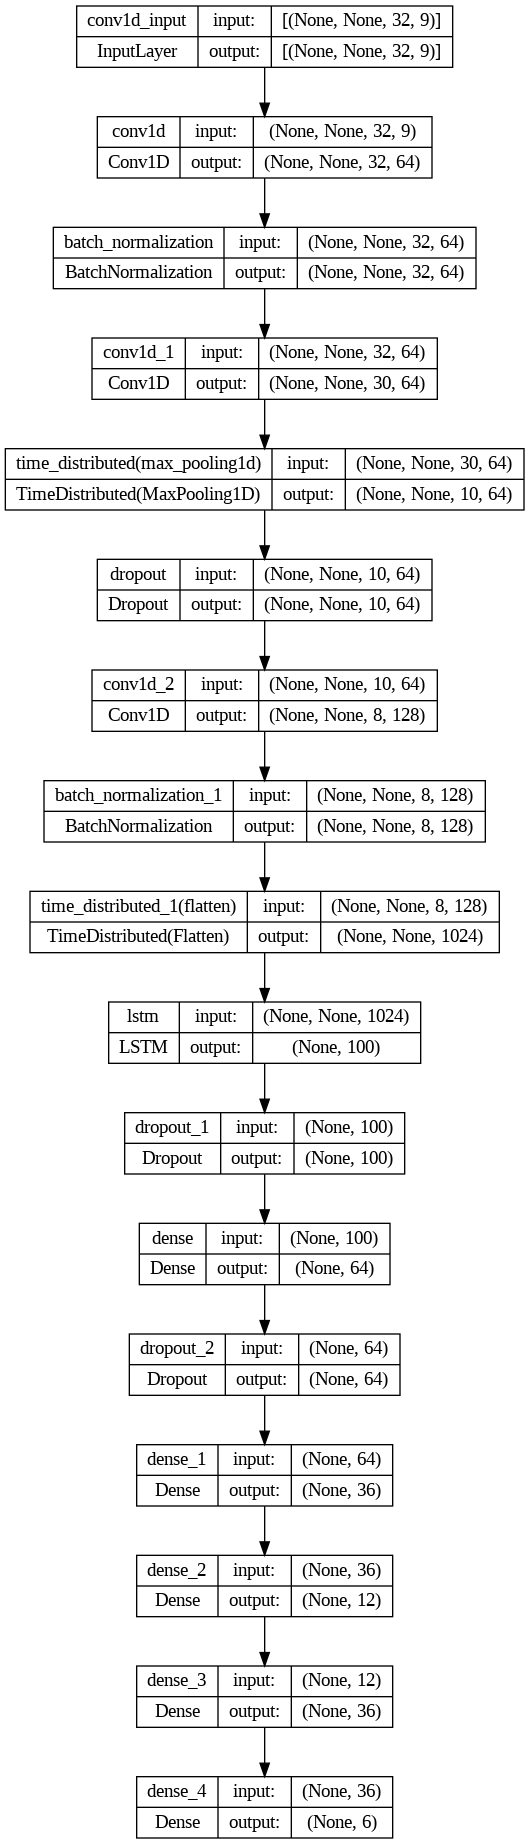

In [20]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)

In [23]:
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

model.compile(
    loss=CategoricalCrossentropy(),
    optimizer=Adam(learning_rate=0.00001),
    metrics=['accuracy']
)

In [24]:
# trainX = (trainX - np.mean(trainX)) / np.std(trainX)
# testX = (testX - np.mean(testX)) / np.std(testX)
history=model.fit(
      trainX, trainy,
      validation_data=(testX, testy),
      batch_size=64,epochs=200, shuffle=True,verbose=2
)

Epoch 1/200
115/115 - 20s - loss: 3.4317 - accuracy: 0.2471 - val_loss: 3.4069 - val_accuracy: 0.1805 - 20s/epoch - 170ms/step
Epoch 2/200
115/115 - 14s - loss: 3.3828 - accuracy: 0.3396 - val_loss: 3.3588 - val_accuracy: 0.2433 - 14s/epoch - 120ms/step
Epoch 3/200
115/115 - 15s - loss: 3.3350 - accuracy: 0.3738 - val_loss: 3.3116 - val_accuracy: 0.3543 - 15s/epoch - 130ms/step
Epoch 4/200
115/115 - 12s - loss: 3.2879 - accuracy: 0.3770 - val_loss: 3.2648 - val_accuracy: 0.3627 - 12s/epoch - 100ms/step
Epoch 5/200
115/115 - 18s - loss: 3.2413 - accuracy: 0.3784 - val_loss: 3.2180 - val_accuracy: 0.3638 - 18s/epoch - 161ms/step
Epoch 6/200
115/115 - 11s - loss: 3.1945 - accuracy: 0.4026 - val_loss: 3.1709 - val_accuracy: 0.4011 - 11s/epoch - 97ms/step
Epoch 7/200
115/115 - 11s - loss: 3.1469 - accuracy: 0.4489 - val_loss: 3.1226 - val_accuracy: 0.4401 - 11s/epoch - 96ms/step
Epoch 8/200
115/115 - 12s - loss: 3.0973 - accuracy: 0.4839 - val_loss: 3.0720 - val_accuracy: 0.4744 - 12s/epoch

Text(0, 0.5, 'Loss')

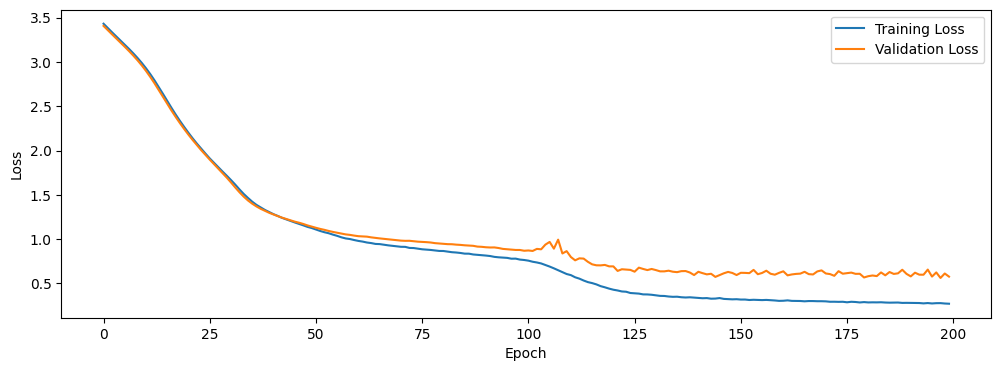

In [25]:
# Access training history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_acc = history.history['accuracy']
validation_acc = history.history['val_accuracy']
# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

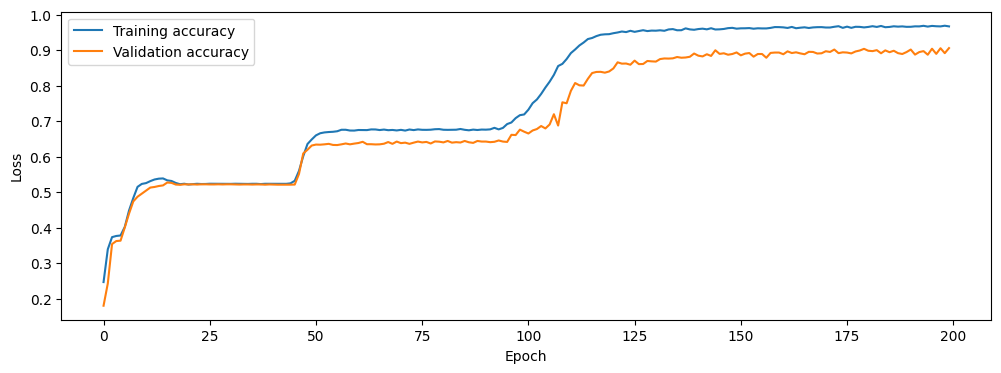

In [26]:
# Access training history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_acc = history.history['accuracy']
validation_acc = history.history['val_accuracy']
# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.plot(training_acc, label='Training accuracy')
plt.plot(validation_acc, label='Validation accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [27]:
loss , accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=2)
#print(model.summary())
score=accuracy*100
print('Accuracy = {}'.format(score))

20/20 - 1s - loss: 0.5766 - accuracy: 0.9063 - 782ms/epoch - 39ms/step
Accuracy = 90.63454270362854


Text(0, 0.5, 'Loss')

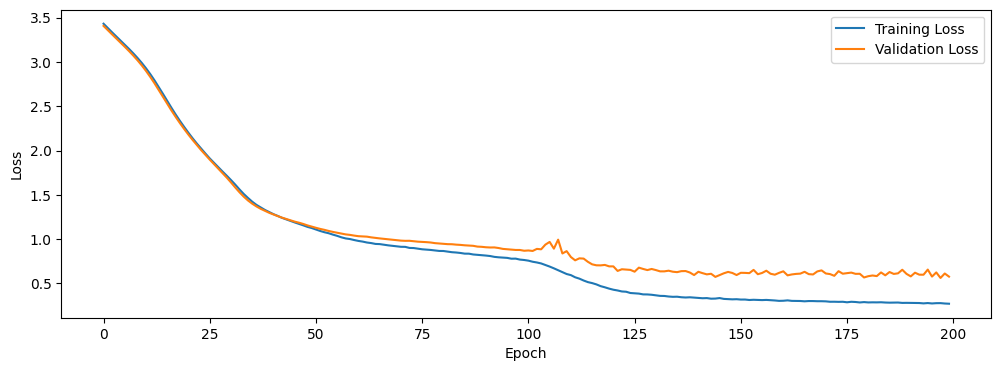

In [28]:
# Access training history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [29]:

# logits = model(x_test)
# prediction_p = tf.nn.softmax(logits)
prediction_p = model.predict(testX)
predicted_class = np.argmax(prediction_p, axis=1)

93/93 [==============================] - 2s 15ms/step


In [30]:
predicted_class

array([4, 4, 4, ..., 1, 1, 1])

In [31]:
# array([[0., 0., 0., 0., 1., 0.],
#        [0., 0., 0., 0., 1., 0.],
#        [0., 0., 0., 0., 1., 0.],
#        ...,
#        [0., 1., 0., 0., 0., 0.],
#        [0., 1., 0., 0., 0., 0.],
#        [0., 1., 0., 0., 0., 0.]], dtype=float32)
# into the array
# array([4, 4, 4, ..., 1, 1, 1])
y_test = np.argmax(testy, axis=1)
y_test

array([4, 4, 4, ..., 1, 1, 1])

In [32]:
accuracy= metrics.accuracy_score(y_true = y_test, y_pred= predicted_class)
print('done prediction... accuracy score = {:.2f}'.format(accuracy*100))

done prediction... accuracy score = 90.63


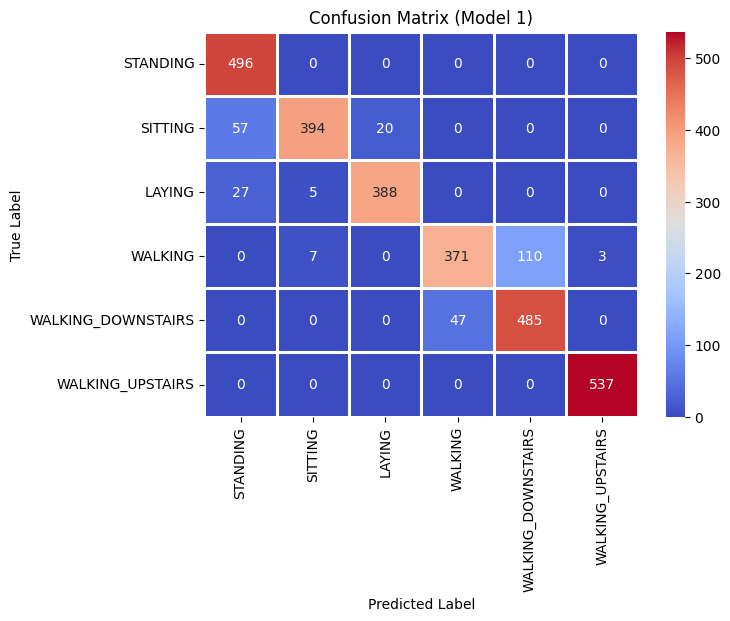

In [33]:
LABELS = ['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS']

def show_confusion_matrix():
    plt.figure(figsize=(7, 5))
    sns.heatmap(cd,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix (Model 1)')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

cd = metrics.confusion_matrix(y_test, predicted_class)
show_confusion_matrix()

Normalized Confusion Matrix:


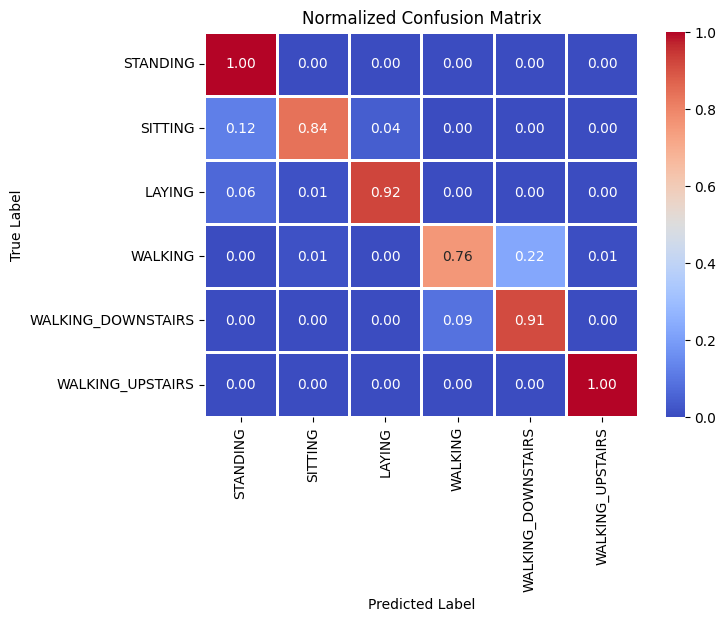

In [34]:
normalized_confusion_matrix = cd.astype('float') / cd.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
LABELS = ['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS']
def show_confusion_matrix():
    plt.figure(figsize=(7, 5))
    sns.heatmap(normalized_confusion_matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='.2f')  # Display values as floats with 2 decimal places
    plt.title('Normalized Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Call the function to display the normalized confusion matrix
show_confusion_matrix()